# Topico de industria 1
Izmael Franco Quezada

# Modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

from scipy.stats import wrapcauchy
from scipy.stats import levy_stable

# from plotly
import plotly.graph_objects as go

import pandas as pd

# Vec2d Class

In [2]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:            
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y
            
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)
    
    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    # rotate vector
    def rotated(self, angle):        
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

# Activity 1: Correlated Random Walk - 1 Trajectory
- Select rotations from a Cauchy distribution (scipy).
- Implement usign Vec2d class.
- Keep trajectory in a numpy array
- Visualize trajectory using plotly - 2D projection

In [5]:
#Initialize the trajectory
n_steps = 100  #number of steps
trajectory = np.zeros((n_steps, 2))  #trajectory in a numpy array

#Initial vector
initial_position = Vec2d(0, 0)
initial_vector = Vec2d(1, 0)

#Random angles using Cauchy distribution
cauchy_rvs = stats.cauchy.rvs(size=n_steps)

current_position = initial_position
current_vector = initial_vector

for i in range(n_steps):
    angle = cauchy_rvs[i]  #Take the random angle
    current_vector = current_vector.rotated(angle)  #Rotate the vector
    current_position = current_position + current_vector  #Update position
    trajectory[i] = [current_position.x, current_position.y]  #Store new position

#Visualize the trajectory using plotly - 2D projection
fig = go.Figure()
fig.add_trace(go.Scatter(x=trajectory[:, 0], y=trajectory[:, 1], mode='lines+markers', name='Trajectory'))

fig.update_layout(
    title='2D Trajectory Using Cauchy Distribution',
    xaxis_title='X_position',
    yaxis_title='Y_position',
    showlegend=True
)


fig.show()

# Activity 2: Lévy distribution - N different curves

- Plot at least the 4 different curves shown in the figure using plotly.
- Each one of the curves corresponds to a different alpha value.
- Consider the following parameters: m = 3.0, beta = 0.

In [29]:
#parameters generation 
alpha_values = [0.3, 0.6, 1.3, 2.0, 2.5,]
beta = 0
m = 3.0
Scale = 1  #standard deviation

#generate X values
x = np.linspace(-2, 10, 400)

#create the plot
fig = go.Figure()

#loop over each alpha value and generate the corresponding curve
for alpha in alpha_values:
    
    y = stats.levy_stable.pdf(x, alpha, beta, loc=m, scale= Scale)
    
    # Add the curve to the plot
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=f'Levy_ {alpha}'))

# Customize the plot
fig.update_layout(
    title="Levy distribution",
    xaxis_title="X_pos",
    yaxis_title="Y_pos",
    showlegend=True
)

# Show the plot
fig.show()

# Activity 3: Lévy distribution - Histograma + Curve

- From a set of random values drawn from a Lévy stable distribution, obtain its histogram and compare it to the corresponding PDF curve.
- Visualize using matplotlib.

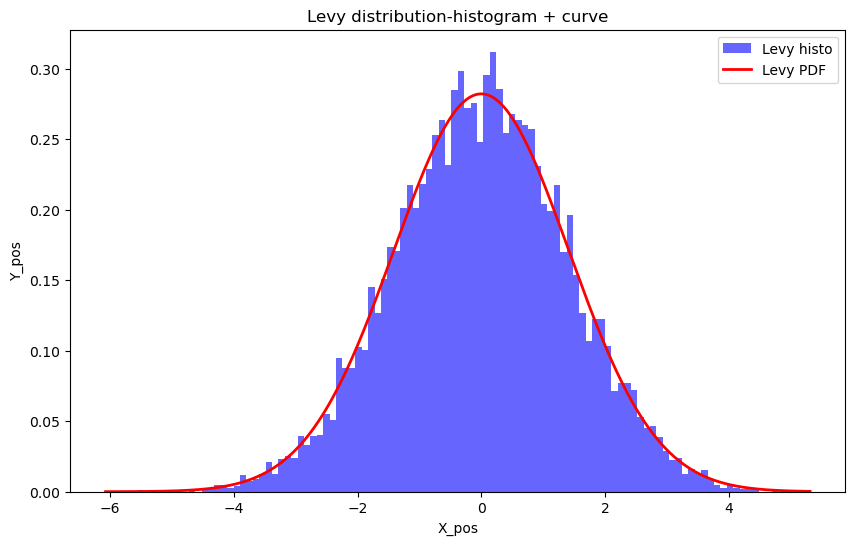

In [33]:
#generate random values from Lévy stable distribution.
alpha = 2.0 
beta = 0  
sample_size = 10000
data = levy_stable.rvs(alpha, beta, size=sample_size)

#plot histogram of the generated values.
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data, bins=100, density=True, alpha=0.6, color='b', label='Levy histo')

#Get the PDF (Lévy distribution)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf = levy_stable.pdf(x, alpha, beta)

#Plot the PDF curve
plt.plot(x, pdf, 'r', lw=2, label='Levy PDF')

#create labels.
plt.title('Levy distribution-histogram + curve')
plt.xlabel('X_pos')
plt.ylabel('Y_pos')
plt.legend()


plt.show()

# Activity 4: Lévy flight - Vec2d - 1 Trajecotry

- Generate a Lévy flight trajectory.
- Implement usign Vec2d class.
- Keep the trajectory in a pandas Data Frame.
- Visualize trajectory using plotly - 3D projection

In [40]:
#levy Flight Simulation / create a Pandas data frame to store the trajectory

def levy_flight_trajectory(n_steps, alpha, beta):
    """Simulate a 2D Lévy flight trajectory."""
    
    #origin (0,0)
    position = Vec2d(0, 0)
    trajectory = [(position.x, position.y)]  #trajectory array
    
    for _ in range(n_steps):
        step_length = levy_stable.rvs(alpha, beta)
        #random angle between 0 and 2π
        angle = np.random.uniform(0, 2 * np.pi)
        step_vector = Vec2d(step_length * np.cos(angle), step_length * np.sin(angle))
        #update position
        position += step_vector
        trajectory.append((position.x, position.y))
    
    return pd.DataFrame(trajectory, columns=["x", "y"])


#Generate Lévy Flight Trajectory
n_steps = 1000
alpha, beta = 1.5, 0
trajectory_df = levy_flight_trajectory(n_steps, alpha, beta)

# Add "z"vector / 3D visualization
trajectory_df['z'] = np.arange(len(trajectory_df))

#Visualize the trajectory using Plotly 3d
fig = go.Figure(data=[go.Scatter3d(
    x=trajectory_df['x'],
    y=trajectory_df['y'],
    z=trajectory_df['z'],
    mode='lines',
    line=dict(color='blue', width=2)
)])

fig.update_layout(
    title='Levy Flight Trajectory in 3D using Vec2d',
    scene=dict(
        xaxis_title='X_pos',
        yaxis_title='Y_pos',
        zaxis_title='Step Number'
    )
)

fig.show()